Reasoning Model Architecture: Detailed Explanation

A Reasoning Model refers to a deep learning architecture that is designed to simulate human reasoning by extracting, analyzing, and logically deducing relationships between inputs. These models are commonly used in Natural Language Processing (NLP), Knowledge Graphs, and Explainable AI.

a) Rule-Based Reasoning Models

These models use predefined logic and symbolic reasoning to infer relationships.
Example: Prolog-based inference systems.

(b) Neural Reasoning Models

These leverage deep learning techniques for reasoning.
Examples:
Graph Neural Networks (GNNs) for reasoning over knowledge graphs.
Neural Theorem Provers (NTPs) for logical inference.
Transformer-based models for reasoning in NLP (e.g., GPT, BERT).

Example: Implementing a Neural Reasoning Model with Graph Neural Networks (GNNs)

A Graph Neural Network (GNN) can be used for reasoning over structured data, such as knowledge graphs or relational datasets.

In [ ]:
# pip install torch torchvision torchaudio torch-geometric

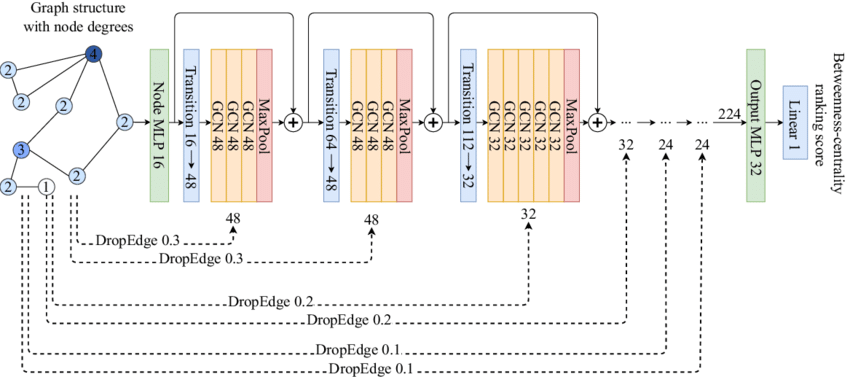

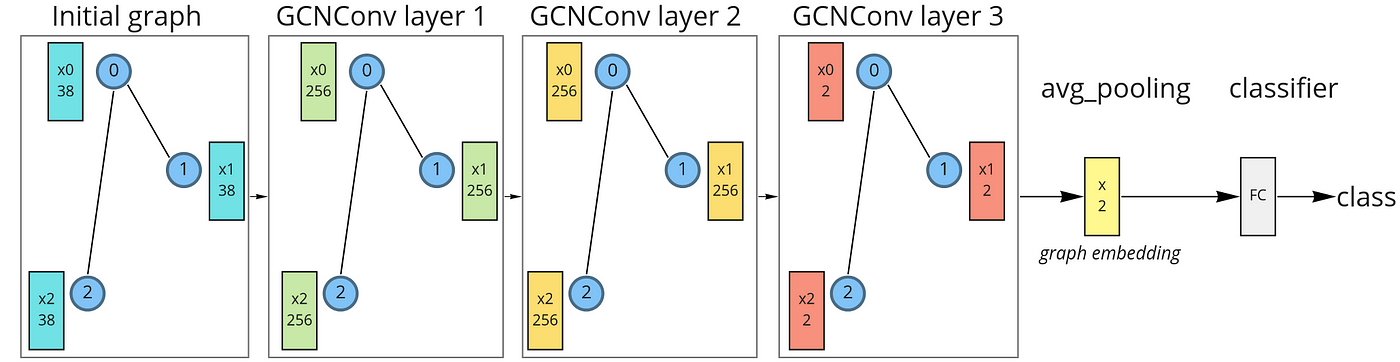

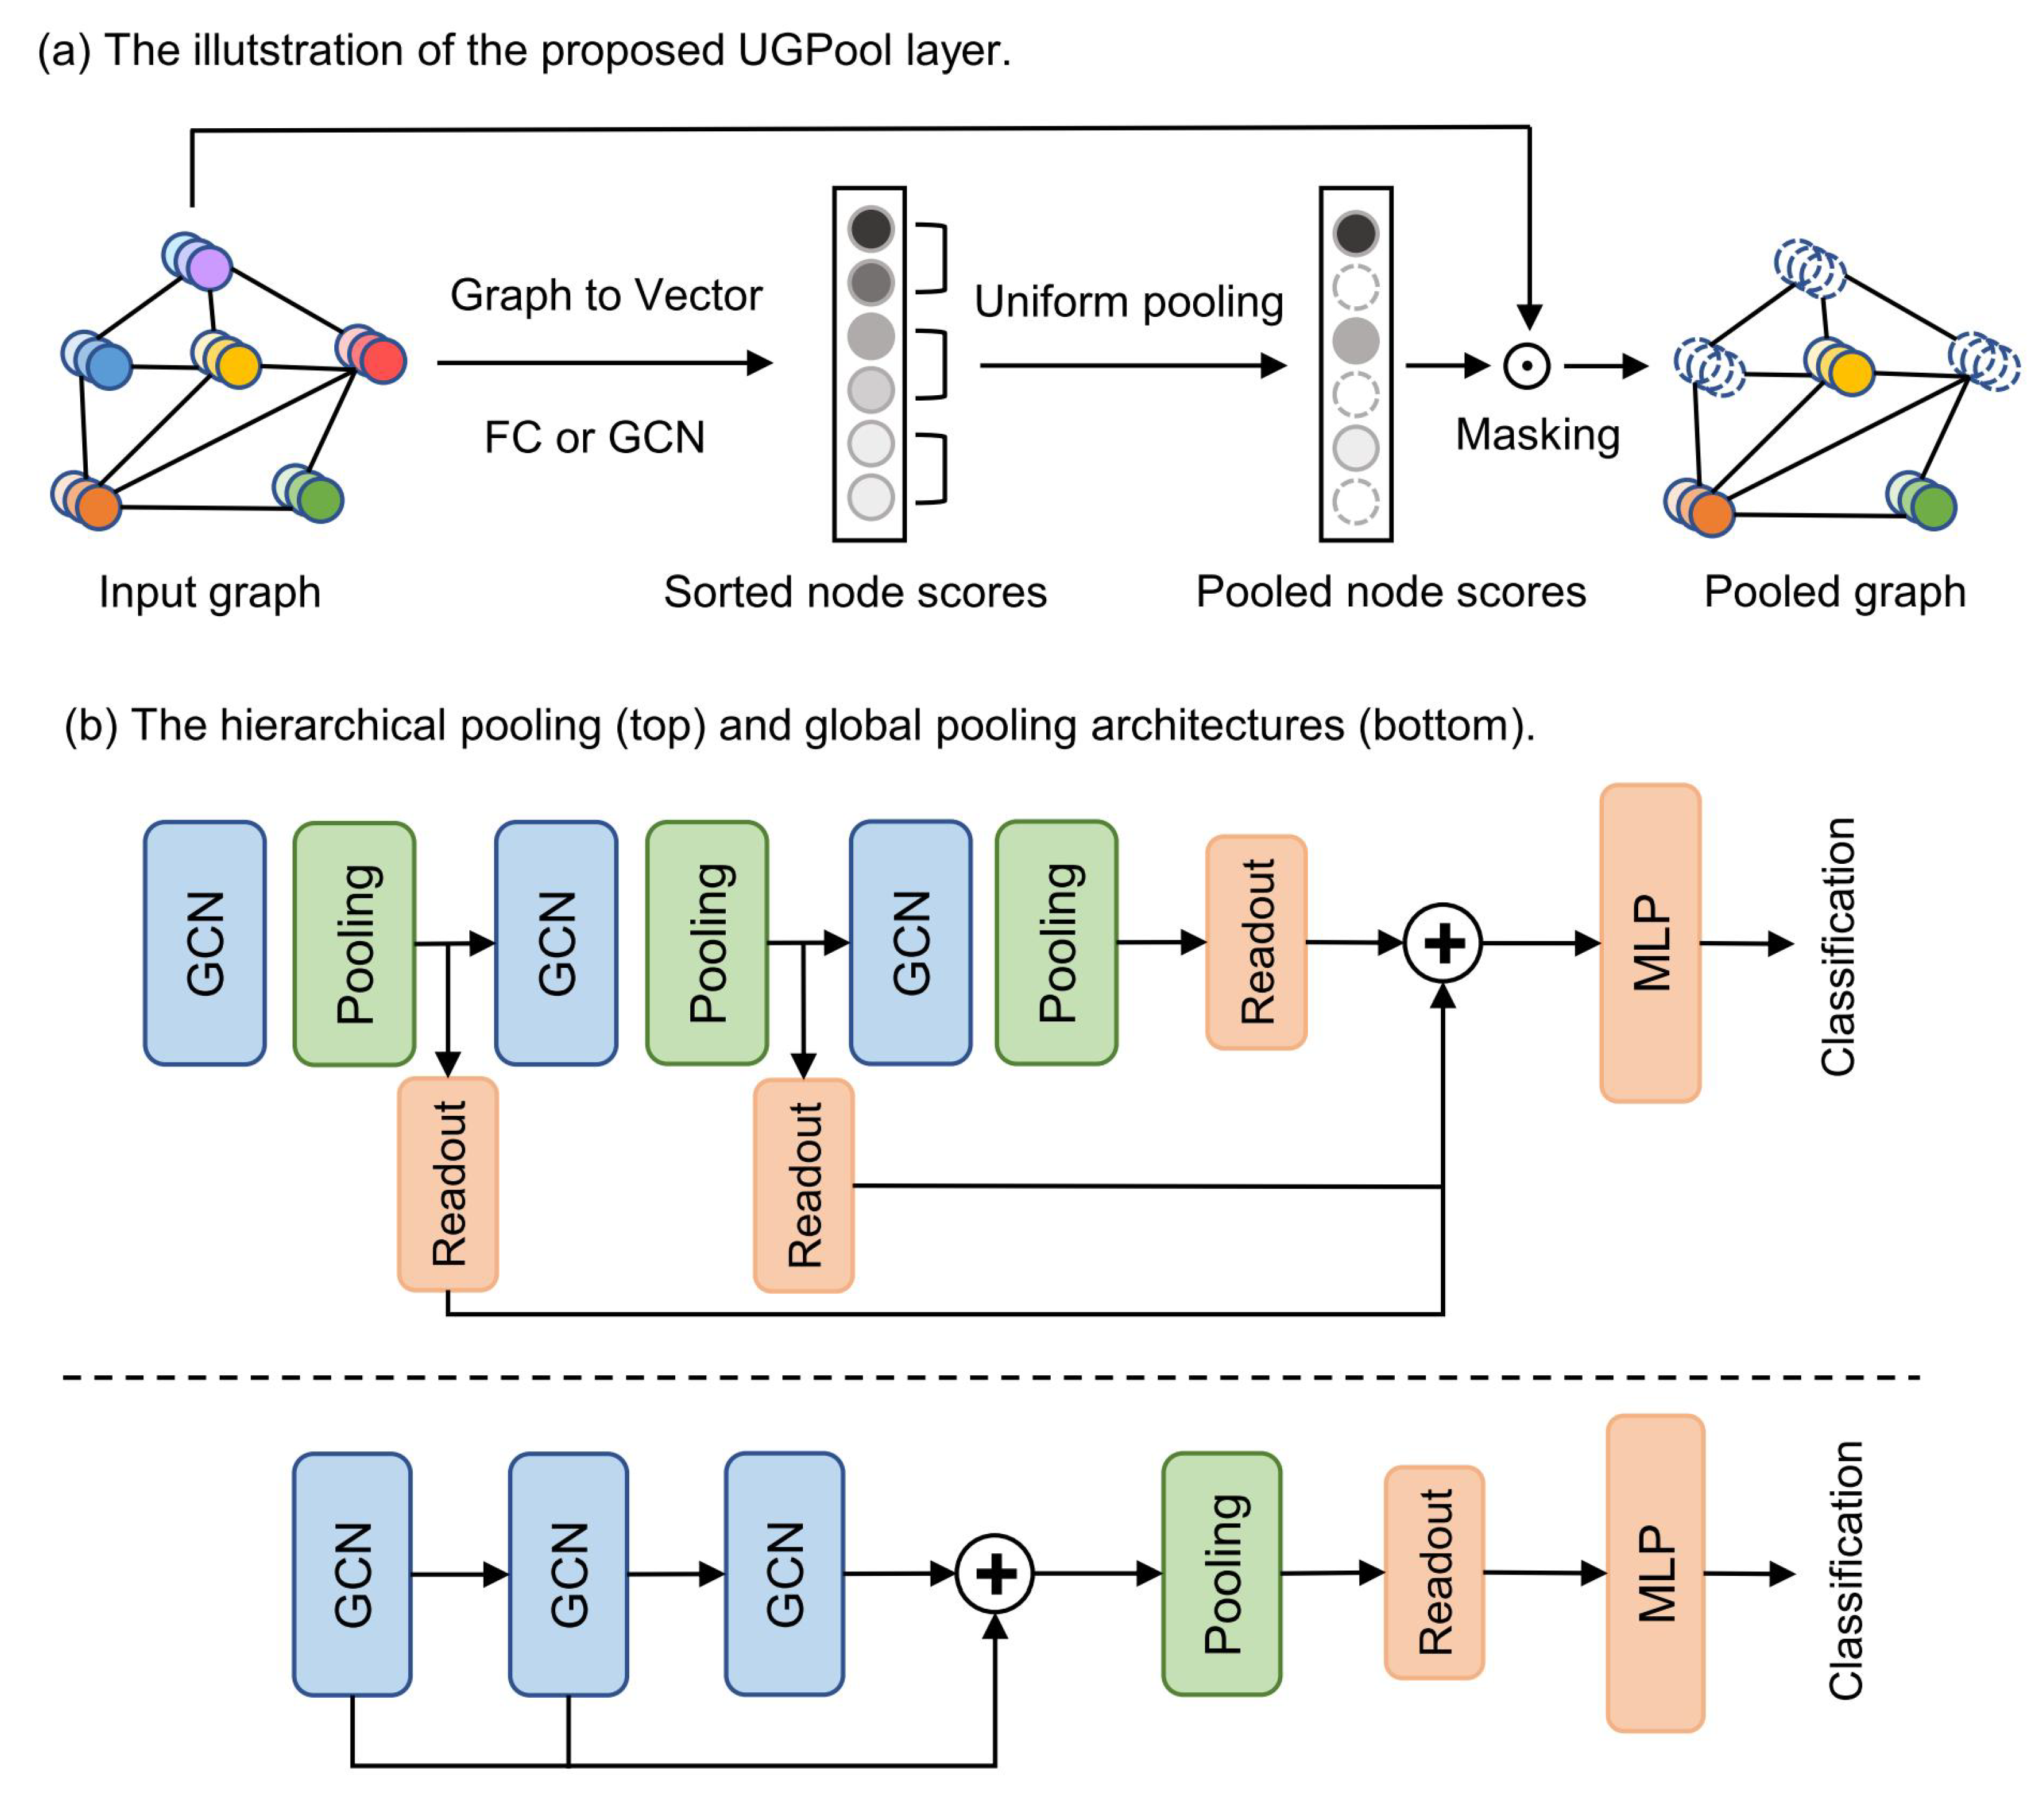

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define a Graph Neural Network (GNN) model
class ReasoningGNN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(ReasoningGNN, self).__init__()
        self.conv1 = GCNConv(num_features, 16) # GCNConv(2, 16) → GCNConv(16, 2): Two-layer GNN for reasoning over relationships.
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create a simple graph dataset (nodes = features, edges = relations)
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)  # Edges between nodes
x = torch.tensor([[1, 0], [0, 1], [1, 1]], dtype=torch.float)  # Node features

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index)

# Define model, optimizer, and loss function
model = ReasoningGNN(num_features=2, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Training the model
model.train()
for epoch in range(50):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, torch.tensor([0, 1, 0]))  # Example labels
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Relational Reasoning in Large Language Models (LLMs)

Relational reasoning refers to the ability of LLMs (Large Language Models) to understand and infer relationships between different entities, concepts, or pieces of information. This is crucial for logical reasoning, multi-hop question answering, commonsense inference, and knowledge-based tasks.

Understanding Context: Recognizing relationships in text, such as cause-effect, analogies, and temporal order.
Knowledge Retrieval: Identifying links between entities in knowledge graphs.
Multi-Hop Inference: Answering complex questions that require reasoning over multiple facts.
Commonsense Reasoning: Recognizing implicit relationships (e.g., "If Alice is Bob's mother, Bob is Alice's son").
Mathematical & Logical Operations: Understanding numerical and symbolic relationships.

2. How LLMs Perform Relational Reasoning

LLMs like GPT, BERT, and Llama perform relational reasoning using the following mechanisms:

(a) Attention Mechanisms

Self-Attention (Transformer Architecture):

Allows models to focus on relationships between words, sentences, or documents.

Helps capture syntactic and semantic relationships efficiently.

Cross-Attention:

Used in tasks like machine translation, where relationships between different languages are inferred.

b) Multi-Hop Reasoning

Uses retrieval-augmented generation (RAG) or knowledge graphs to retrieve intermediate steps in reasoning.
Example: Answering "Who was Einstein’s PhD advisor?" requires retrieving Einstein’s biography and extracting relevant facts.

(c) Knowledge Graph Embeddings

LLMs can be enhanced with Knowledge Graphs (KGs) to improve structured relational reasoning.
Example: BERT-KG, T5 + Wikidata.

(d) Chain-of-Thought (CoT) Prompting

Improves reasoning by breaking complex problems into intermediate reasoning steps.
Example: Instead of directly answering "Who is the tallest person in Einstein’s family?", the model identifies Einstein’s family members and then retrieves height details.

In [ ]:
# pip install openai

In [ ]:
import openai

openai.api_key = "your_api_key"

def relational_reasoning(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "You are an expert in relational reasoning."},
                  {"role": "user", "content": prompt}]
    )
    return response["choices"][0]["message"]["content"]

# Example: Relational reasoning task
prompt = "If Alice is Bob's sister and Bob is Charlie's father, what is Alice's relation to Charlie?"
result = relational_reasoning(prompt)
print(result)  # Expected: Alice is Charlie's aunt.


4. Enhancing LLMs for Relational Reasoning

(a) Graph Neural Networks (GNNs) + LLMs

LLMs can be combined with Graph Neural Networks (GNNs) to improve reasoning over knowledge graphs.

(b) Retrieval-Augmented Generation (RAG)

LLMs use external knowledge sources (Wikipedia, Wikidata) for fact-based relational reasoning.

(c) Reinforcement Learning with Human Feedback (RLHF)

Helps refine relational reasoning by training models with human feedback.

1. What is a Knowledge Graph (KG)?

A Knowledge Graph (KG) is a structured representation of knowledge where entities (nodes) are connected by relationships (edges). It helps in reasoning, search, and knowledge retrieval.

Example KG:

(Einstein) → [born_in] → (Germany)

(Tesla) → [worked_with] → (Edison)

(Apple) → [founded_by] → (Steve Jobs)

2. Why Combine LLMs with KGs?

LLMs like GPT, Llama, and Claude lack structured relational reasoning and may hallucinate incorrect facts. Combining them with Knowledge Graphs (KGs) improves:

Factual Accuracy: Prevents hallucination by verifying answers.

Explainability: Traces back to structured data.

Multi-Hop Reasoning: Enables complex queries requiring multiple steps.

Retrieval-Augmented Generation (RAG): Fetches external knowledge before generating responses.

LLMs like GPT, Llama, and Claude lack structured relational reasoning and may hallucinate incorrect facts. Combining them with Knowledge Graphs (KGs) improves:

Factual Accuracy: Prevents hallucination by verifying answers.
Explainability: Traces back to structured data.
Multi-Hop Reasoning: Enables complex queries requiring multiple steps.
Retrieval-Augmented Generation (RAG): Fetches external knowledge before generating responses.

3. How to Integrate KGs with LLMs?

(a) Retrieval-Augmented Generation (RAG)

The LLM queries a KG database (e.g., Wikidata, Neo4j, DBpedia).

Retrieves facts before generating a response.
Example Workflow

User Query: "Where was Einstein born?"

KG Lookup → Retrieves (Einstein → born_in → Germany)

LLM Response: "Einstein was born in Germany."

🔹 Tools: LangChain, Wikidata SPARQL, Neo4j, NetworkX

b) Knowledge Graph Embeddings

Instead of direct lookup, convert graphs into vector embeddings and feed them to LLMs.

Steps:

Convert KG into embeddings using Node2Vec, TransE, ComplEx.

Store embeddings in a vector database (e.g., FAISS, Pinecone).

Retrieve relevant nodes during inference.

Enhance LLM response with structured knowledge.

🔹 Tools: PyKEEN, DGL-KE, Hugging Face Transformers



(c) Graph Neural Networks (GNNs) + LLMs

Train Graph Neural Networks (GNNs) to understand relational structures before feeding them into an LLM.

Example:
Use GNN (e.g., GCN, GraphSAGE) to process a medical KG.
Train it to predict disease-drug relationships.
Feed extracted knowledge into GPT for reasoning.
🔹 Tools: PyTorch Geometric, Deep Graph Library (DGL)

In [ ]:
# pip install SPARQLWrapper openai

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import openai

# Wikidata Query Function
def query_wikidata(entity):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    query = f"""
    SELECT ?placeLabel WHERE {{
      ?person wdt:P31 wd:Q5;
              rdfs:label "{entity}"@en;
              wdt:P19 ?place.
      SERVICE wikibase:label {{"bd:serviceParam wikibase:language 'en'."}}
    }}
    LIMIT 1
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results["results"]["bindings"][0]["placeLabel"]["value"]

# OpenAI LLM Query Function
openai.api_key = "your_api_key"
def ask_llm(question, fact):
    prompt = f"Question: {question}\nFact from Wikidata: {fact}\nAnswer:"
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "You are an expert reasoning AI."},
                  {"role": "user", "content": prompt}]
    )
    return response["choices"][0]["message"]["content"]

# Example: Ask about Einstein
entity = "Albert Einstein"
fact = query_wikidata(entity)
response = ask_llm(f"Where was {entity} born?", fact)
print(response)


1. Why Do We Need GNNs for Relational Reasoning?

Large Language Models (LLMs) struggle with structured reasoning because they process text sequentially and do not explicitly model relationships between entities.
However, Graph Neural Networks (GNNs) excel at capturing relational structures in knowledge graphs (KGs), making them a powerful complement to LLMs.

2. What is a Graph Neural Network (GNN)?

A GNN is a deep learning model designed to process graph-structured data. It learns node and edge representations by aggregating information from neighbors in a message-passing mechanism.

3. How GNNs Enhance Relational Reasoning in LLMs

Challenge in LLMs	How GNNs Help
Lack of Explicit Relations: LLMs do not store structured connections between entities.	Graph Embeddings: GNNs model explicit relationships, improving reasoning over entities.
Multi-Hop Reasoning is Hard: LLMs struggle with complex dependencies.	Graph Propagation: GNNs aggregate multi-hop neighbor information.
Hallucination (False Facts): LLMs may generate misleading information.	Knowledge Verification: GNNs retrieve real-world facts from knowledge graphs.
Poor Performance on Structured Data: LLMs are trained on text, not graphs.	Hybrid KG-LLM Models: GNNs provide structured input to LLMs.

4. How GNNs Process Relational Information

A Knowledge Graph (KG) consists of nodes (entities) and edges (relationships).
Example:

(Einstein) → [born_in] → (Germany)

(Tesla) → [worked_with] → (Edison)

(Apple) → [founded_by] → (Steve Jobs)

GNN Message Passing Algorithm
Initialize Nodes: Each entity starts with an embedding (e.g., a word vector).
Message Passing: Nodes receive information from neighbors.
Aggregation: Information from connected nodes is aggregated.
Update Representation: The node embedding is updated based on its neighbors.
Prediction: The final embeddings are used for reasoning tasks.


In [ ]:
# pip install torch torch-geometric transformers openai

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define a simple knowledge graph (Einstein → born_in → Germany)
edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)  # Edges
node_features = torch.rand((3, 16))  # Random 16-dim features for 3 nodes

# Create PyTorch Geometric Graph
data = Data(x=node_features, edge_index=edge_index)

# Define GNN Model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(16, 32)
        self.conv2 = GCNConv(32, 16)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# Train the GNN
model = GNN()
output_embeddings = model(data)


In [ ]:
import openai

openai.api_key = "your_api_key"

def ask_llm(entity, embedding):
    prompt = f"Using structured knowledge, describe {entity} with embedding {embedding.tolist()}."
    
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "system", "content": "You are an expert in relational reasoning."},
                  {"role": "user", "content": prompt}]
    )
    return response["choices"][0]["message"]["content"]

# Get reasoning for node 0 (Einstein)
einstein_embedding = output_embeddings[0]
response = ask_llm("Albert Einstein", einstein_embedding)
print(response)


(c) Medical Reasoning

GNNs model disease-symptom relations.
Example: "Fever + cough → likely cause?" → Flu (based on KG).

(d) Financial & Legal Reasoning

Graphs represent corporate hierarchies, contracts, or fraud detection.
GNNs find relationships, and LLMs explain them.

Reinforcement Learning with Human Feedback (RLHF) – A Deep Dive

1. What is RLHF?

Reinforcement Learning with Human Feedback (RLHF) is a technique that fine-tunes large language models (LLMs) using human preferences instead of predefined rewards. It helps models align with human values, reduce biases, and improve response quality.

💡 Key Idea: Instead of relying on a traditional reward function, human labelers rank model outputs, and a reward model is trained to mimic these preferences. The LLM is then fine-tuned using Proximal Policy Optimization (PPO).



3. RLHF Training Pipeline

The RLHF process involves three key steps:

Step 1: Pretrain a Language Model (LM)

A transformer-based LLM (e.g., GPT-4) is first trained on a large corpus of text using self-supervised learning.
It learns basic knowledge, grammar, and fluency.
Step 2: Train a Reward Model (RM)

Human labelers rank multiple outputs of the LLM for a given prompt.
A reward model (RM) is trained to predict these human rankings.

In [ ]:
# 1️⃣ "Practice daily, read books, and get feedback." ✅ (Preferred)
# 2️⃣ "Just write more and don't worry about mistakes." ❌
# 3️⃣ "Buy an expensive writing tool and use it daily." ❌

Step 3: Fine-tune the LM using RL (PPO Algorithm)
The base LLM is fine-tuned using Proximal Policy Optimization (PPO).
The reward model (RM) provides feedback, and the LLM is updated to maximize this reward.
PPO ensures stable policy updates while avoiding drastic changes.

In [ ]:
# pip install transformers datasets trl accelerate peft bitsandbytes

 Load a Pretrained Model

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the base LLM
model_name = "meta-llama/Llama-2-7b-chat-hf"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)


Define a Reward Model

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load a pretrained reward model (example: OpenAssistant/reward-model)
reward_model_name = "OpenAssistant/reward-model"
reward_model = AutoModelForSequenceClassification.from_pretrained(reward_model_name, num_labels=1)


Fine-tune the LLM using PPO

In [ ]:
from trl import PPOTrainer, PPOConfig

# Define PPO Training Configuration
config = PPOConfig(
    model_name=model_name,
    learning_rate=1e-6,
    batch_size=4,
    gradient_accumulation_steps=8
)

trainer = PPOTrainer(model, reward_model, config)

# Sample training loop
for batch in train_dataloader:
    queries, responses = batch["query"], batch["response"]
    
    # Compute rewards using RM
    rewards = reward_model(queries, responses).logits
    
    # Optimize policy model using PPO
    trainer.step(queries, responses, rewards)
